# MPS using the deesse wrapper - simulations with rotation in 3D

## Main points addressed:
- deesse simulation with rotation in 3D, meaning of angles (azimuth, dip and plunge)

## Defining rotation in 3D
The user should give the rotation that is applied to the TI to obtain the desired orientation of the structure.
A rotation in 3D is defined by three elementary rotations, given by three angles: $\alpha$ (azimuth), $\beta$ (dip), and $\gamma$ (plunge):
1. $Oxyz \xrightarrow{\text{rot. of }-\alpha \text{ around }Oz}  Ox'y'z'$.
2. $Ox'y'z' \xrightarrow{\text{rot. of }-\beta \text{ around }Ox'} Ox''y''z''$.
3. $Ox''y''z'' \xrightarrow{\text{rot. of angle }-\gamma \text{ around }Oy''} Ox'''y'''z'''$.

The TI being given in the system $Oxyz$, the system $Ox'''y'''z'''$ correspond to the new orientation (desired for the simulation). Note that rotation can be applied globally or locally, with or without tolerance (see example in the jupyter notebook `ex_deesse_05_geom_transformation`).

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv 

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)
geone version: 1.1.9


In [3]:
pv.set_jupyter_backend('static') # to get static plots within the jupyter notebook

## The training image used for illustrations
The training image consists of circular pipes (cylinders) along the $y$-axis with an horizontal stripe in the middle. It is built from a section given in a png image.

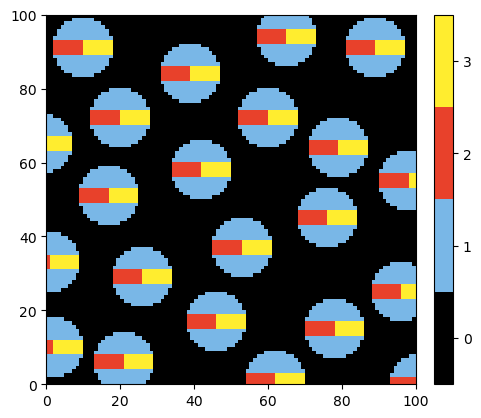

In [4]:
# Read the section from png
ti2d, col = gn.img.readImage2Drgb('ti_tubes_section.png', categ=True)
gn.imgplot.drawImage2D(ti2d, categ=True, categCol=col)
plt.show()

In [5]:
# Build the 3D TI (extruding)
ny = 100 # length of pipe in number of pixels
ti = gn.img.Img(ti2d.nx, ny, ti2d.ny, nv=1, 
                val=np.array([np.tile(x, ny).reshape(ny,-1) for x in ti2d.val.reshape(ti2d.ny, ti2d.nx)]),
                varname='facies')

# Get facies
facies = ti.get_unique()
facies

[0.0, 1.0, 2.0, 3.0]

In [6]:
# Colors for facies
colors = col # get from colors above
# colors = ['gray', 'lightblue', 'orange', 'yellow']

# Facies to be shown
facies_to_show = [1, 2, 3]

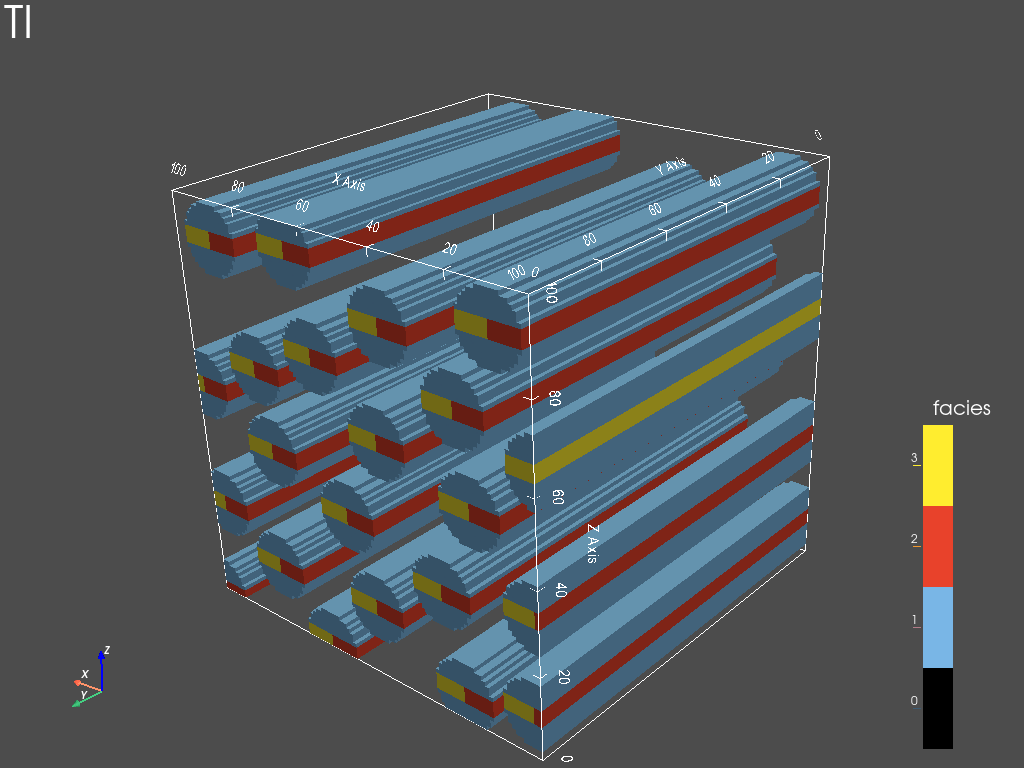

In [7]:
# Viewing the TI in 3D
#    - filter out the plotted values
#    - use (automatic) custom scalar (color) bar for categories with given colors
#    - set title for the scalar bar

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(notebook=False)
# ... inline
pp = pv.Plotter()
gn.imgplot3d.drawImage3D_surface(ti, plotter=pp, filtering_value=facies_to_show, 
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 scalar_bar_kwargs={'title':'facies','title_font_size':20, 'vertical':True},
                                 text='TI')
cpos = [(-150, 270, 190), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos) # position of the camera can be specified

## Building images of local angles used further

Simulation grid is the same one as the TI grid.

In [8]:
nx, ny, nz = ti.nx, ti.ny, ti.nz
sx, sy, sz = ti.sx, ti.sy, ti.sz 
ox, oy, oz = ti.ox, ti.oy, ti.oz

### Angle images 
- `azimuth_img`: values varying linearly from $0^{o}$ to $90^{o}$ along $y$-axis
- `dip_img`: values varying linearly from $90^{o}$ to $0^{o}$ along $z$-axis
- `plunge_img`: values varying linearly from $0^{o}$ to $-90^{o}$ along $x$-axis

In [9]:
vy = np.linspace(0, 90, ny) # values along y-axis
vz = np.linspace(90, 0, nz) # values along z-axis
vx = np.linspace(0, -90, nx) # values along x-axis

val_azimuth = np.tile(np.repeat(vy, nx), nz)
val_dip     = np.repeat(vz, nx*ny)
val_plunge  = np.tile(vx, ny*nz)

img_azimuth = gn.img.Img(nx, ny, nz, sx, sy, sz, ox, oy, oz, nv=1, val=val_azimuth, varname='azimuth')
img_dip     = gn.img.Img(nx, ny, nz, sx, sy, sz, ox, oy, oz, nv=1, val=val_dip,     varname='dip')
img_plunge  = gn.img.Img(nx, ny, nz, sx, sy, sz, ox, oy, oz, nv=1, val=val_plunge,  varname='plunge')

In [10]:
# Set color map for angles
cmap_azimuth = 'plasma'
cmap_dip     = 'rainbow'
cmap_plunge  = gn.customcolors.cmap2

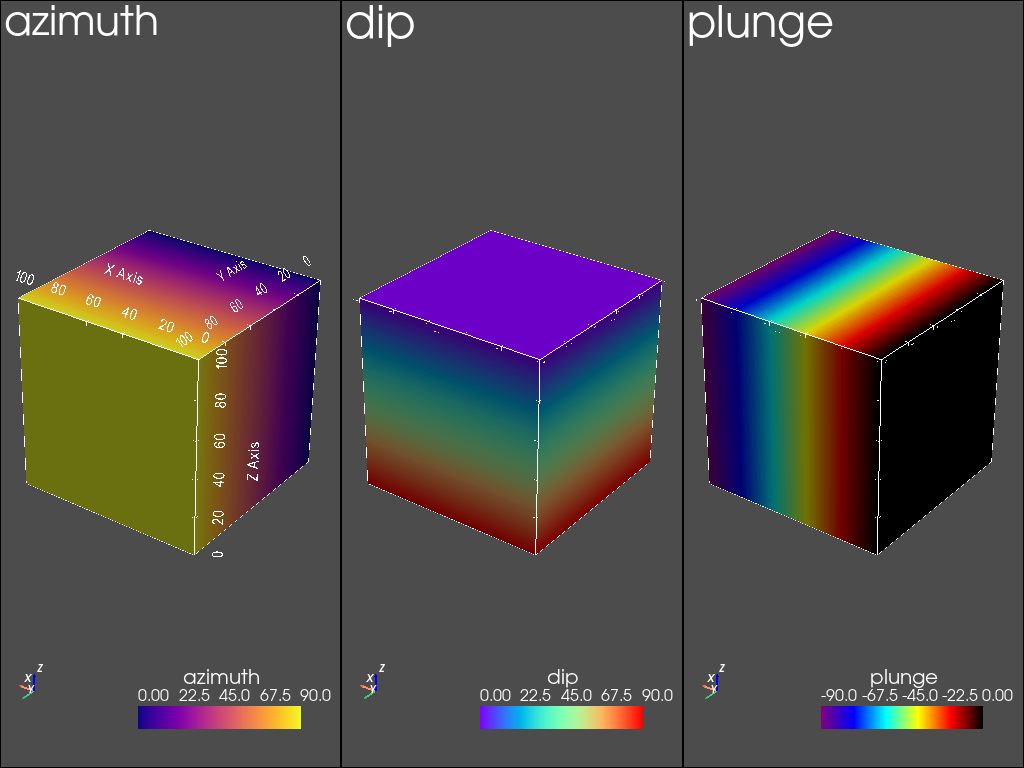

In [11]:
# Plot angle images

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(1,3), notebook=False)
# ... inline
pp = pv.Plotter(shape=(1,3))

# ... plot 
pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(img_azimuth,
                                 plotter=pp, cmap=cmap_azimuth,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_azimuth.varname[0])

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(img_dip,
                                 plotter=pp, cmap=cmap_dip,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_dip.varname[0])

pp.subplot(0, 2)
gn.imgplot3d.drawImage3D_surface(img_plunge,
                                 plotter=pp, cmap=cmap_plunge,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_plunge.varname[0])

pp.link_views()
cpos = [(-300, 540, 380), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)

## Main simulation parameters for the following

In [12]:
nneighboringNode = 32
distanceThreshold = 0.07
maxScanFraction = 0.01

## Simulation setting (local) azimuth only

In [13]:
# Set deesse input and launch simulation (one real)
nreal = 1
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='facies',
    nTI=1, TI=ti,
    rotationUsage=1,             # use rotation without tolerance
    rotationAzimuthLocal=True,   #    rotation according to azimuth: local
    rotationAzimuth=val_azimuth, #    rotation azimuth: map of values
    distanceType='categorical',
    nneighboringNode=nneighboringNode,
    distanceThreshold=distanceThreshold,
    maxScanFraction=maxScanFraction,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)

deesse_output = gn.deesseinterface.deesseRun(deesse_input)

# Retrieve the result
sim_azimuth = deesse_output['sim'][0]

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230208 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete


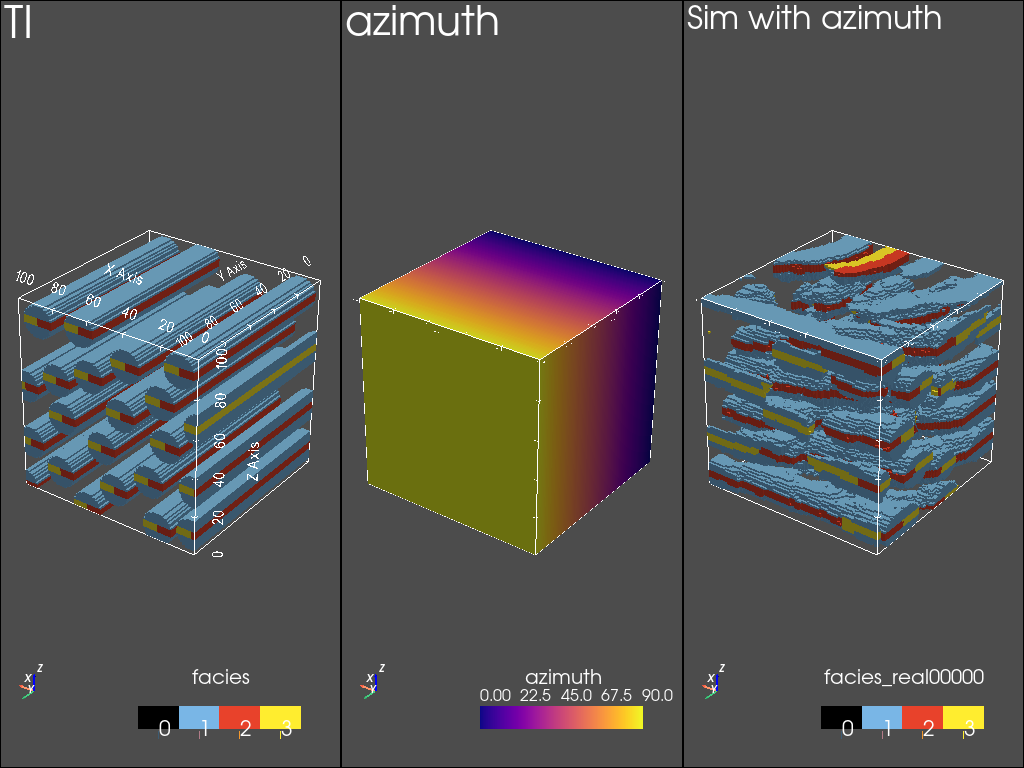

In [14]:
# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(1,3), notebook=False)
# ... inline
pp = pv.Plotter(shape=(1,3))

pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(ti, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='TI')

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(img_azimuth,
                                 plotter=pp, cmap=cmap_azimuth,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_azimuth.varname[0])

pp.subplot(0, 2)
gn.imgplot3d.drawImage3D_surface(sim_azimuth, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='Sim with azimuth')

pp.link_views()
cpos = [(-300, 540, 380), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)

## Simulation setting (local) dip only

In [15]:
# Set deesse input and launch simulation (one real)
nreal = 1
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='facies',
    nTI=1, TI=ti,
    rotationUsage=1,             # use rotation without tolerance
    rotationDipLocal=True,       #    rotation according to dip: local
    rotationDip=val_dip,         #    rotation dip: map of values
    distanceType='categorical',
    nneighboringNode=nneighboringNode,
    distanceThreshold=distanceThreshold,
    maxScanFraction=maxScanFraction,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)

deesse_output = gn.deesseinterface.deesseRun(deesse_input)

# Retrieve the result
sim_dip = deesse_output['sim'][0]

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230208 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete


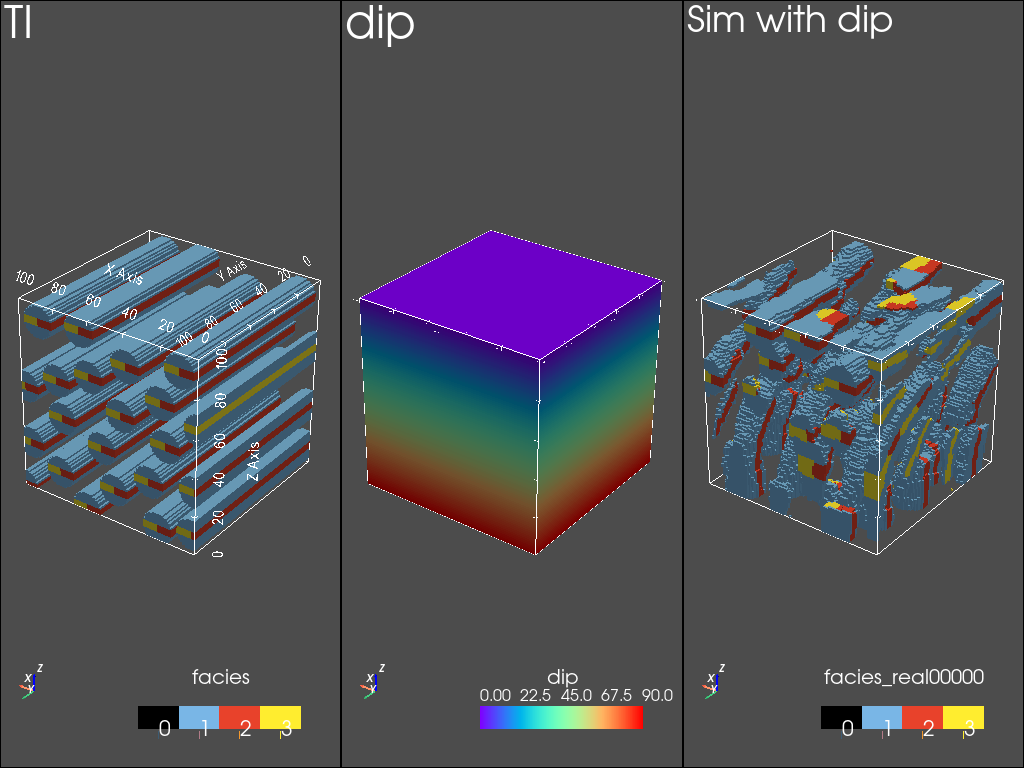

In [16]:
# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(1,3), notebook=False)
# ... inline
pp = pv.Plotter(shape=(1,3))

pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(ti, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='TI')

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(img_dip,
                                 plotter=pp, cmap=cmap_dip,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_dip.varname[0])

pp.subplot(0, 2)
gn.imgplot3d.drawImage3D_surface(sim_dip, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='Sim with dip')

pp.link_views()
cpos = [(-300, 540, 380), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)

## Simulation setting (local) plunge only

In [17]:
# Set deesse input and launch simulation (one real)
nreal = 1
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='facies',
    nTI=1, TI=ti,
    rotationUsage=1,             # use rotation without tolerance
    rotationPlungeLocal=True,    #    rotation according to plunge: local
    rotationPlunge=val_plunge,   #    rotation plunge: map of values
    distanceType='categorical',
    nneighboringNode=nneighboringNode,
    distanceThreshold=distanceThreshold,
    maxScanFraction=maxScanFraction,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)

deesse_output = gn.deesseinterface.deesseRun(deesse_input)

# Retrieve the result
sim_plunge = deesse_output['sim'][0]

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230208 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete


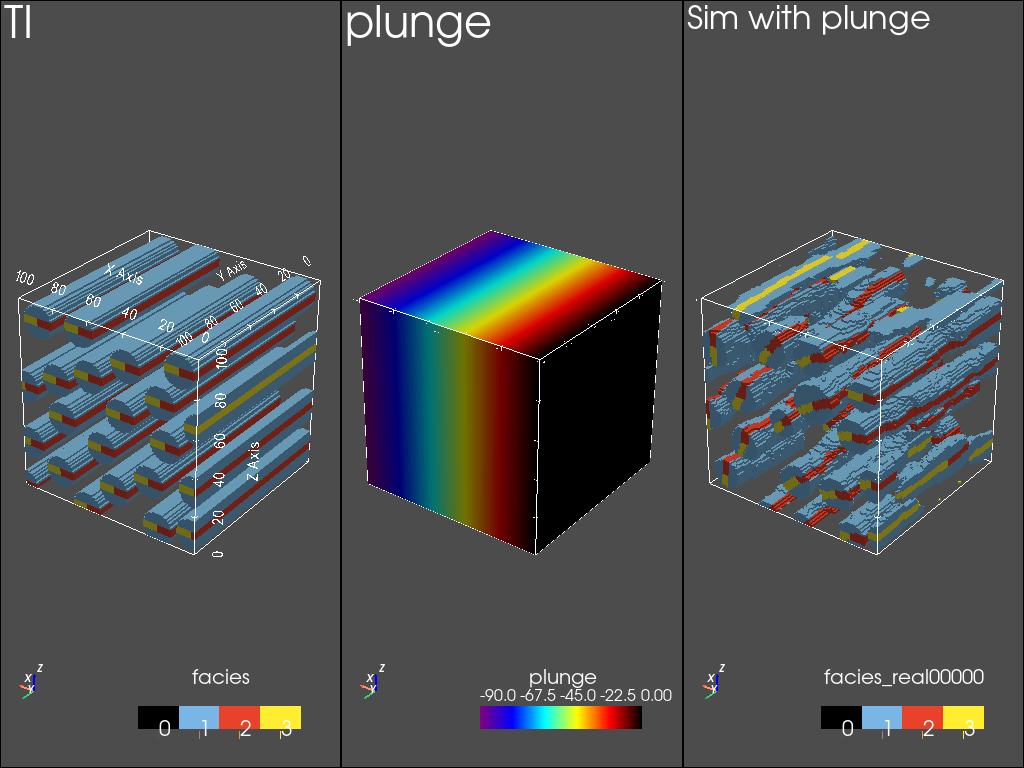

In [18]:
# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(1,3), notebook=False)
# ... inline
pp = pv.Plotter(shape=(1,3))

pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(ti, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='TI')

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(img_plunge,
                                 plotter=pp, cmap=cmap_plunge,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_plunge.varname[0])

pp.subplot(0, 2)
gn.imgplot3d.drawImage3D_surface(sim_plunge, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='Sim with plunge')

pp.link_views()
cpos = [(-300, 540, 380), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)

## Simulation setting (local) azimuth and dip

In [19]:
# Set deesse input and launch simulation (one real)
nreal = 1
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='facies',
    nTI=1, TI=ti,
    rotationUsage=1,             # use rotation without tolerance
    rotationAzimuthLocal=True,   #    rotation according to azimuth: local
    rotationAzimuth=val_azimuth, #    rotation azimuth: map of values
    rotationDipLocal=True,       #    rotation according to dip: local
    rotationDip=val_dip,         #    rotation dip: map of values
    distanceType='categorical',
    nneighboringNode=nneighboringNode,
    distanceThreshold=distanceThreshold,
    maxScanFraction=maxScanFraction,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)

deesse_output = gn.deesseinterface.deesseRun(deesse_input)

# Retrieve the result
sim_azimuth_dip = deesse_output['sim'][0]

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230208 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete


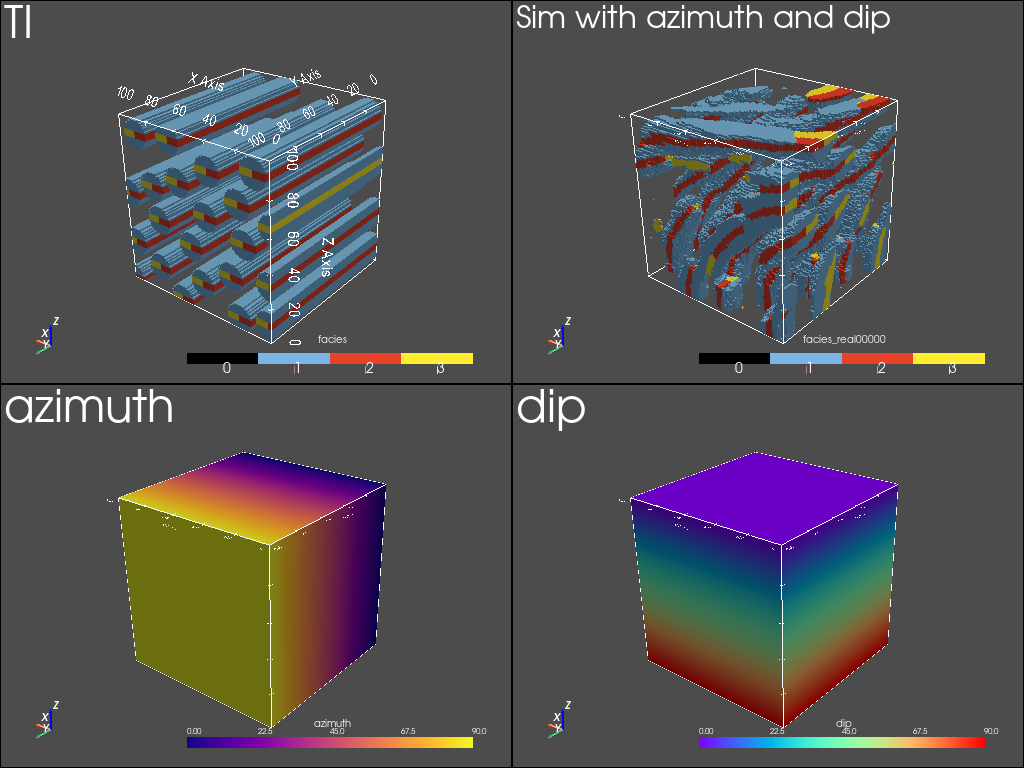

In [20]:
# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(ti, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='TI')

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(sim_azimuth_dip, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='Sim with azimuth and dip')

pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_surface(img_azimuth,
                                 plotter=pp, cmap=cmap_azimuth,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_azimuth.varname[0])

pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_surface(img_dip,
                                 plotter=pp, cmap=cmap_dip,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_dip.varname[0])

pp.link_views()
cpos = [(-180, 324, 228), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)

## Simulation setting (local) azimuth and plunge

In [21]:
# Set deesse input and launch simulation (one real)
nreal = 1
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='facies',
    nTI=1, TI=ti,
    rotationUsage=1,             # use rotation without tolerance
    rotationAzimuthLocal=True,   #    rotation according to azimuth: local
    rotationAzimuth=val_azimuth, #    rotation azimuth: map of values
    rotationPlungeLocal=True,    #    rotation according to plunge: local
    rotationPlunge=val_plunge,   #    rotation plunge: map of values
    distanceType='categorical',
    nneighboringNode=nneighboringNode,
    distanceThreshold=distanceThreshold,
    maxScanFraction=maxScanFraction,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)

deesse_output = gn.deesseinterface.deesseRun(deesse_input)

# Retrieve the result
sim_azimuth_plunge = deesse_output['sim'][0]

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230208 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete


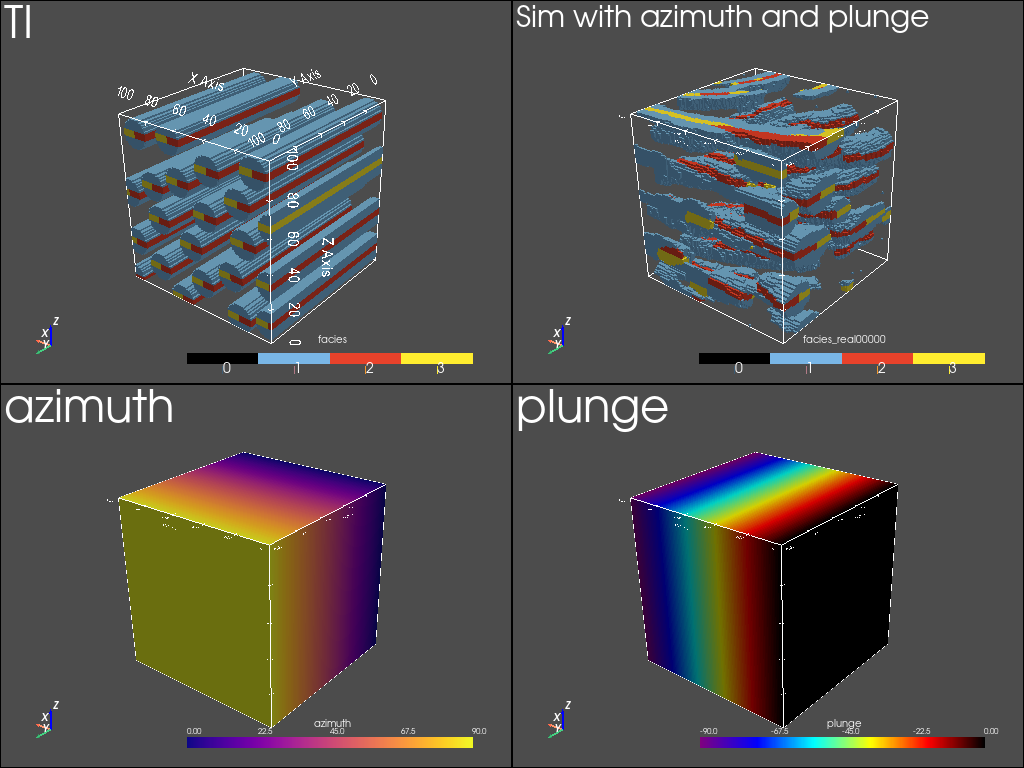

In [22]:
# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(ti, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='TI')

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(sim_azimuth_plunge, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='Sim with azimuth and plunge')

pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_surface(img_azimuth,
                                 plotter=pp, cmap=cmap_azimuth,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_azimuth.varname[0])

pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_surface(img_plunge,
                                 plotter=pp, cmap=cmap_plunge,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_plunge.varname[0])

pp.link_views()
cpos = [(-180, 324, 228), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)

## Simulation setting (local) dip and plunge

In [23]:
# Set deesse input and launch simulation (one real)
nreal = 1
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='facies',
    nTI=1, TI=ti,
    rotationUsage=1,             # use rotation without tolerance
    rotationDipLocal=True,       #    rotation according to dip: local
    rotationDip=val_dip,         #    rotation dip: map of values
    rotationPlungeLocal=True,    #    rotation according to plunge: local
    rotationPlunge=val_plunge,   #    rotation plunge: map of values
    distanceType='categorical',
    nneighboringNode=nneighboringNode,
    distanceThreshold=distanceThreshold,
    maxScanFraction=maxScanFraction,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)

deesse_output = gn.deesseinterface.deesseRun(deesse_input)

# Retrieve the result
sim_dip_plunge = deesse_output['sim'][0]

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230208 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete


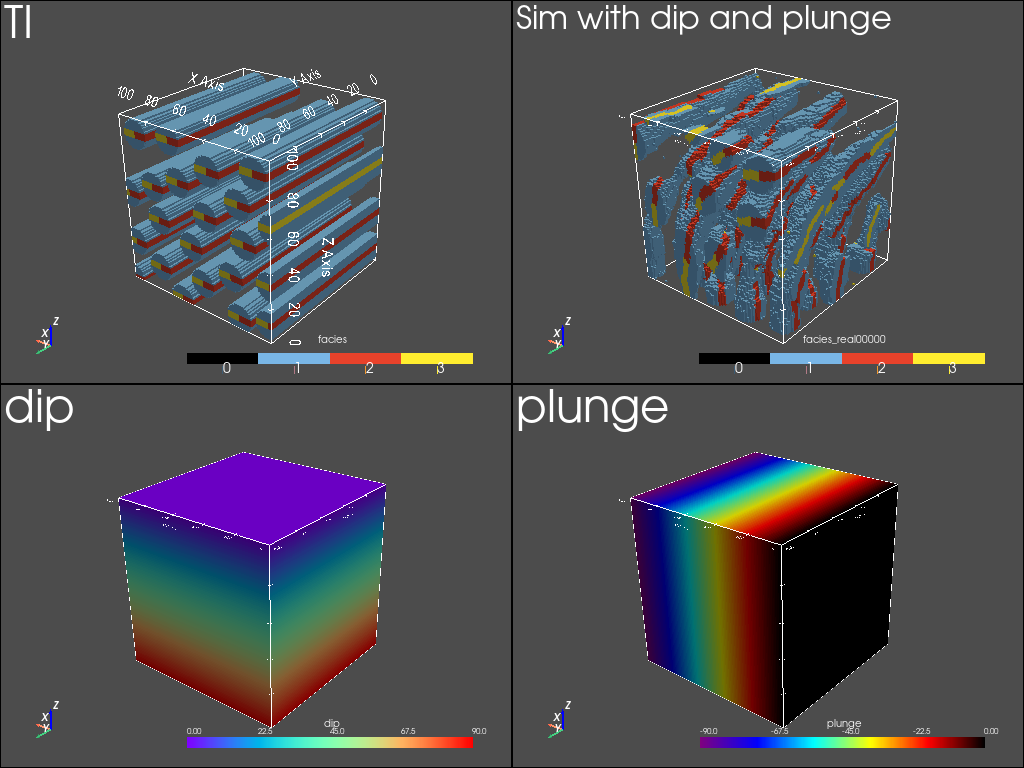

In [24]:
# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(ti, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='TI')

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(sim_dip_plunge, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='Sim with dip and plunge')

pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_surface(img_dip,
                                 plotter=pp, cmap=cmap_dip,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_dip.varname[0])

pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_surface(img_plunge,
                                 plotter=pp, cmap=cmap_plunge,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_plunge.varname[0])

pp.link_views()
cpos = [(-180, 324, 228), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)

## Simulation setting (local) azimuth, dip and plunge

In [25]:
# Set deesse input and launch simulation (one real)
nreal = 1
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='facies',
    nTI=1, TI=ti,
    rotationUsage=1,             # use rotation without tolerance
    rotationAzimuthLocal=True,   #    rotation according to azimuth: local
    rotationAzimuth=val_azimuth, #    rotation azimuth: map of values
    rotationDipLocal=True,       #    rotation according to dip: local
    rotationDip=val_dip,         #    rotation dip: map of values
    rotationPlungeLocal=True,    #    rotation according to plunge: local
    rotationPlunge=val_plunge,   #    rotation plunge: map of values
    distanceType='categorical',
    nneighboringNode=nneighboringNode,
    distanceThreshold=distanceThreshold,
    maxScanFraction=maxScanFraction,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)

deesse_output = gn.deesseinterface.deesseRun(deesse_input)

# Retrieve the result
sim_azimuth_dip_plunge = deesse_output['sim'][0]

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230208 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete


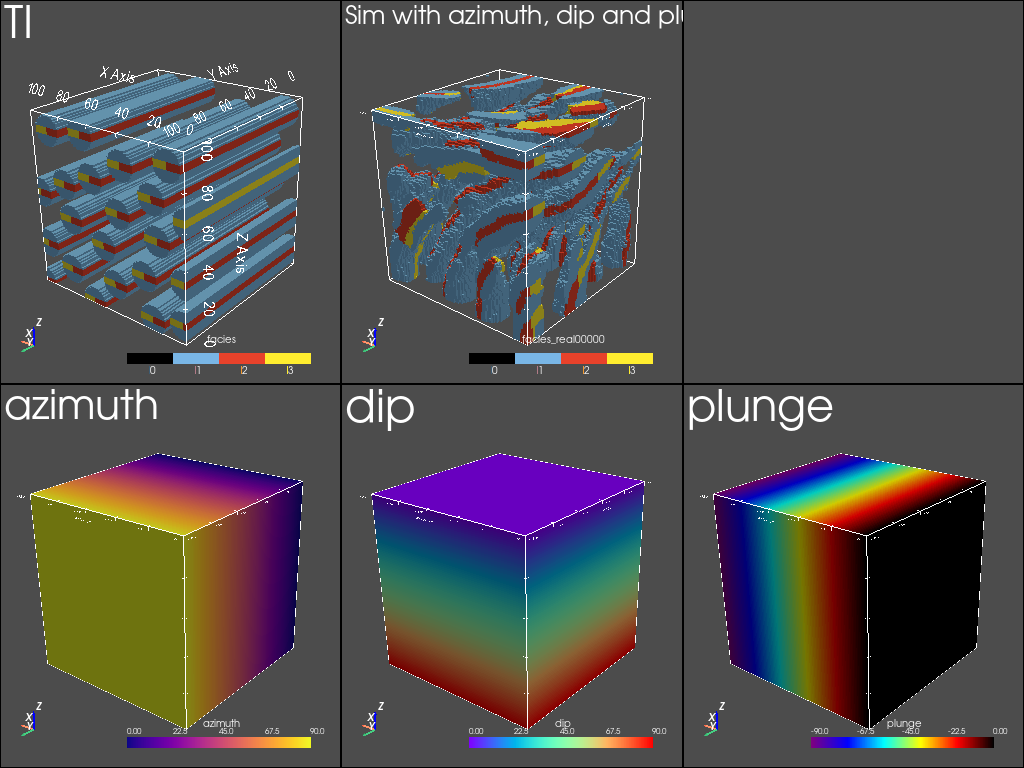

In [26]:
# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,3), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,3))

pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(ti, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='TI')

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(sim_azimuth_dip_plunge, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='Sim with azimuth, dip and plunge')

pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_surface(img_azimuth,
                                 plotter=pp, cmap=cmap_azimuth,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_azimuth.varname[0])

pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_surface(img_dip,
                                 plotter=pp, cmap=cmap_dip,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_dip.varname[0])

pp.subplot(1, 2)
gn.imgplot3d.drawImage3D_surface(img_plunge,
                                 plotter=pp, cmap=cmap_plunge,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img_plunge.varname[0])

pp.link_views()
cpos = [(-180, 323, 209), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)

## Simulation setting (local) azimuth, dip and plunge (other angle images)

In [27]:
v = np.linspace(0, 90, ny)
vv = np.tile(np.repeat(vy, nx), nz)

val2_azimuth = vv
val2_dip     = vv
val2_plunge  = -vv
img2_azimuth = gn.img.Img(nx, ny, nz, sx, sy, sz, ox, oy, oz, nv=1, val=val2_azimuth, varname='azimuth')
img2_dip     = gn.img.Img(nx, ny, nz, sx, sy, sz, ox, oy, oz, nv=1, val=val2_dip,     varname='dip')
img2_plunge  = gn.img.Img(nx, ny, nz, sx, sy, sz, ox, oy, oz, nv=1, val=val2_plunge,  varname='plunge')

In [28]:
# Set deesse input and launch simulation (one real)
nreal = 1
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='facies',
    nTI=1, TI=ti,
    rotationUsage=1,              # use rotation without tolerance
    rotationAzimuthLocal=True,    #    rotation according to azimuth: local
    rotationAzimuth=val2_azimuth, #    rotation azimuth: map of values
    rotationDipLocal=True,        #    rotation according to dip: local
    rotationDip=val2_dip,         #    rotation dip: map of values
    rotationPlungeLocal=True,     #    rotation according to plunge: local
    rotationPlunge=val2_plunge,   #    rotation plunge: map of values
    distanceType='categorical',
    nneighboringNode=nneighboringNode,
    distanceThreshold=distanceThreshold,
    maxScanFraction=maxScanFraction,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)

deesse_output = gn.deesseinterface.deesseRun(deesse_input)

# Retrieve the result
sim2_azimuth_dip_plunge = deesse_output['sim'][0]

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230208 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete


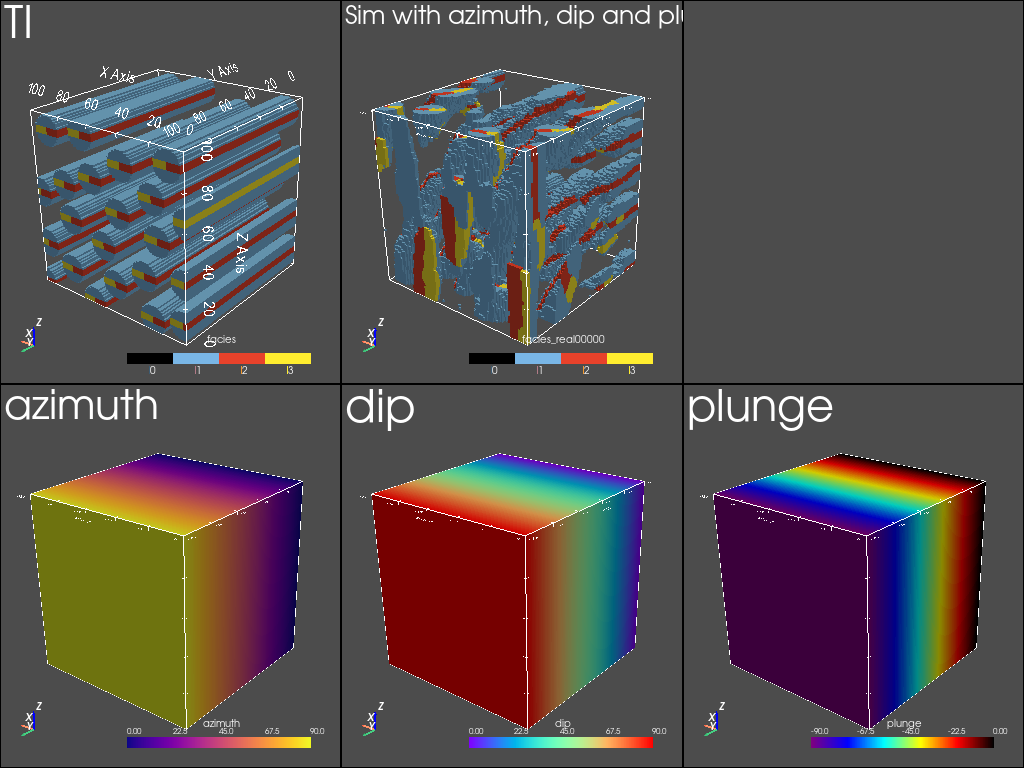

In [29]:
# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,3), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,3))

pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_surface(ti, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='TI')

pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_surface(sim2_azimuth_dip_plunge, filtering_value=facies_to_show, 
                                 plotter=pp,
                                 custom_scalar_bar_for_equidistant_categories=True, 
                                 custom_colors=colors,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text='Sim with azimuth, dip and plunge')

pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_surface(img2_azimuth,
                                 plotter=pp, cmap=cmap_azimuth,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img2_azimuth.varname[0])

pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_surface(img2_dip,
                                 plotter=pp, cmap=cmap_dip,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img2_dip.varname[0])

pp.subplot(1, 2)
gn.imgplot3d.drawImage3D_surface(img2_plunge,
                                 plotter=pp, cmap=cmap_plunge,
                                 show_bounds=True,   # add bounds (axis with graduation)
                                 text=img2_plunge.varname[0])

pp.link_views()
cpos = [(-180, 323, 209), (50.0, 50.0, 50.0), (0.25, -0.33, 0.90)] # camera position
pp.show(cpos=cpos)